In [1]:
'''libraries list with help showing the version of the libraries being used in this nodebook'''
libraries = []

'''Datasets, arrays and files '''
import pandas as pd
import numpy as np
import pickle
libraries.append('pandas')
libraries.append('numpy')
libraries.append('pickle')

'''Following progress'''
from tqdm.notebook import tqdm
libraries.append('tqdm')

'''Plots'''
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpldatacursor import datacursor
from mpldatacursor import HighlightingDataCursor
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn-paper')
plt.rcParams["figure.facecolor"] = "w"

libraries.append('matplotlib')
libraries.append('mpldatacursor')
libraries.append('seaborn')
libraries.append('plotly')
                 
'''Networks and community detection'''
import networkx as nx
#import igraph as ig
#import community as community_louvain
#from networkx.algorithms import community
#from sklearn import cluster
libraries.append('networkx')
#libraries.append('igraph')

'''Measures and utilities'''
import scipy.stats as stats
from Levenshtein import distance
from statistics import median
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
import datetime
import powerlaw
import collections
libraries.append('scipy')
libraries.append('powerlaw')
libraries.append('collections')
libraries.append('scikit-learn')

'''Pthon and library version'''
import types
import pkg_resources
import sys
from platform import python_version

In [2]:
'''To display version of Software being used'''
print('Version of python installed: {}' .format(sys.version))
print('Version of python being used: {}' .format(python_version()))
print('\nNon-built in libraries being used:')

for m in pkg_resources.working_set:
    if m.project_name.lower() in libraries:
        print('{}, version {}'.format(m.project_name,m.version))

Version of python installed: 3.8.10 (default, May 19 2021, 11:01:55) 
[Clang 10.0.0 ]
Version of python being used: 3.8.10

Non-built in libraries being used:
tqdm, version 4.62.3
seaborn, version 0.11.2
scipy, version 1.4.1
scikit-learn, version 0.22.1
powerlaw, version 1.4.6
plotly, version 5.1.0
pandas, version 1.3.3
numpy, version 1.19.2
networkx, version 2.6.3
mpldatacursor, version 0.7.1
matplotlib, version 3.4.3


# To retrieve the saved networks

In [3]:
'''Threshold = 0.001'''
g1 = nx.read_gpickle("../_generated_data/Net_1v3.gpickle")

'''Threshold = 0.002'''
g2 = nx.read_gpickle("../_generated_data/Net_2v3.gpickle")

'''Threshold = 0.003'''
g3 = nx.read_gpickle("../_generated_data/Net_3v3.gpickle")

In [4]:
list(g1.edges(data=True))[0] #To check the information associated with each edge

('coronavirus',
 'lilbaby',
 {'weight': 0.000907148167756907,
  'similarity': 10,
  'correlation': {'correlation': -0.2540457286044366}})

In [5]:
def measures(G):
    '''Returns a dict rm containing tuple (edge) as key
    and a list of measures [correlation, levenshtein distance, weight]'''
    data = list(G.edges(data=True))
    rm = {}
    edge_colors = []
    
    for edge1, edge2, dictionary in data:
        tup = (edge1, edge2)
        dic_feat = dictionary['correlation']
        dic_feat['similarity_distance'] = dictionary['similarity']
        dic_feat['weight'] = dictionary['weight']                     
        measures = list(dic_feat.values())
        rm[tup] = measures
        if G.nodes[edge1]['color'] == G.nodes[edge2]['color']:
            edge_colors.append(G.nodes[edge1]['color'])
        else:
            edge_colors.append((0.1373, 0.1373, 0.1373))
    return rm, edge_colors

<IPython.core.display.Javascript object>


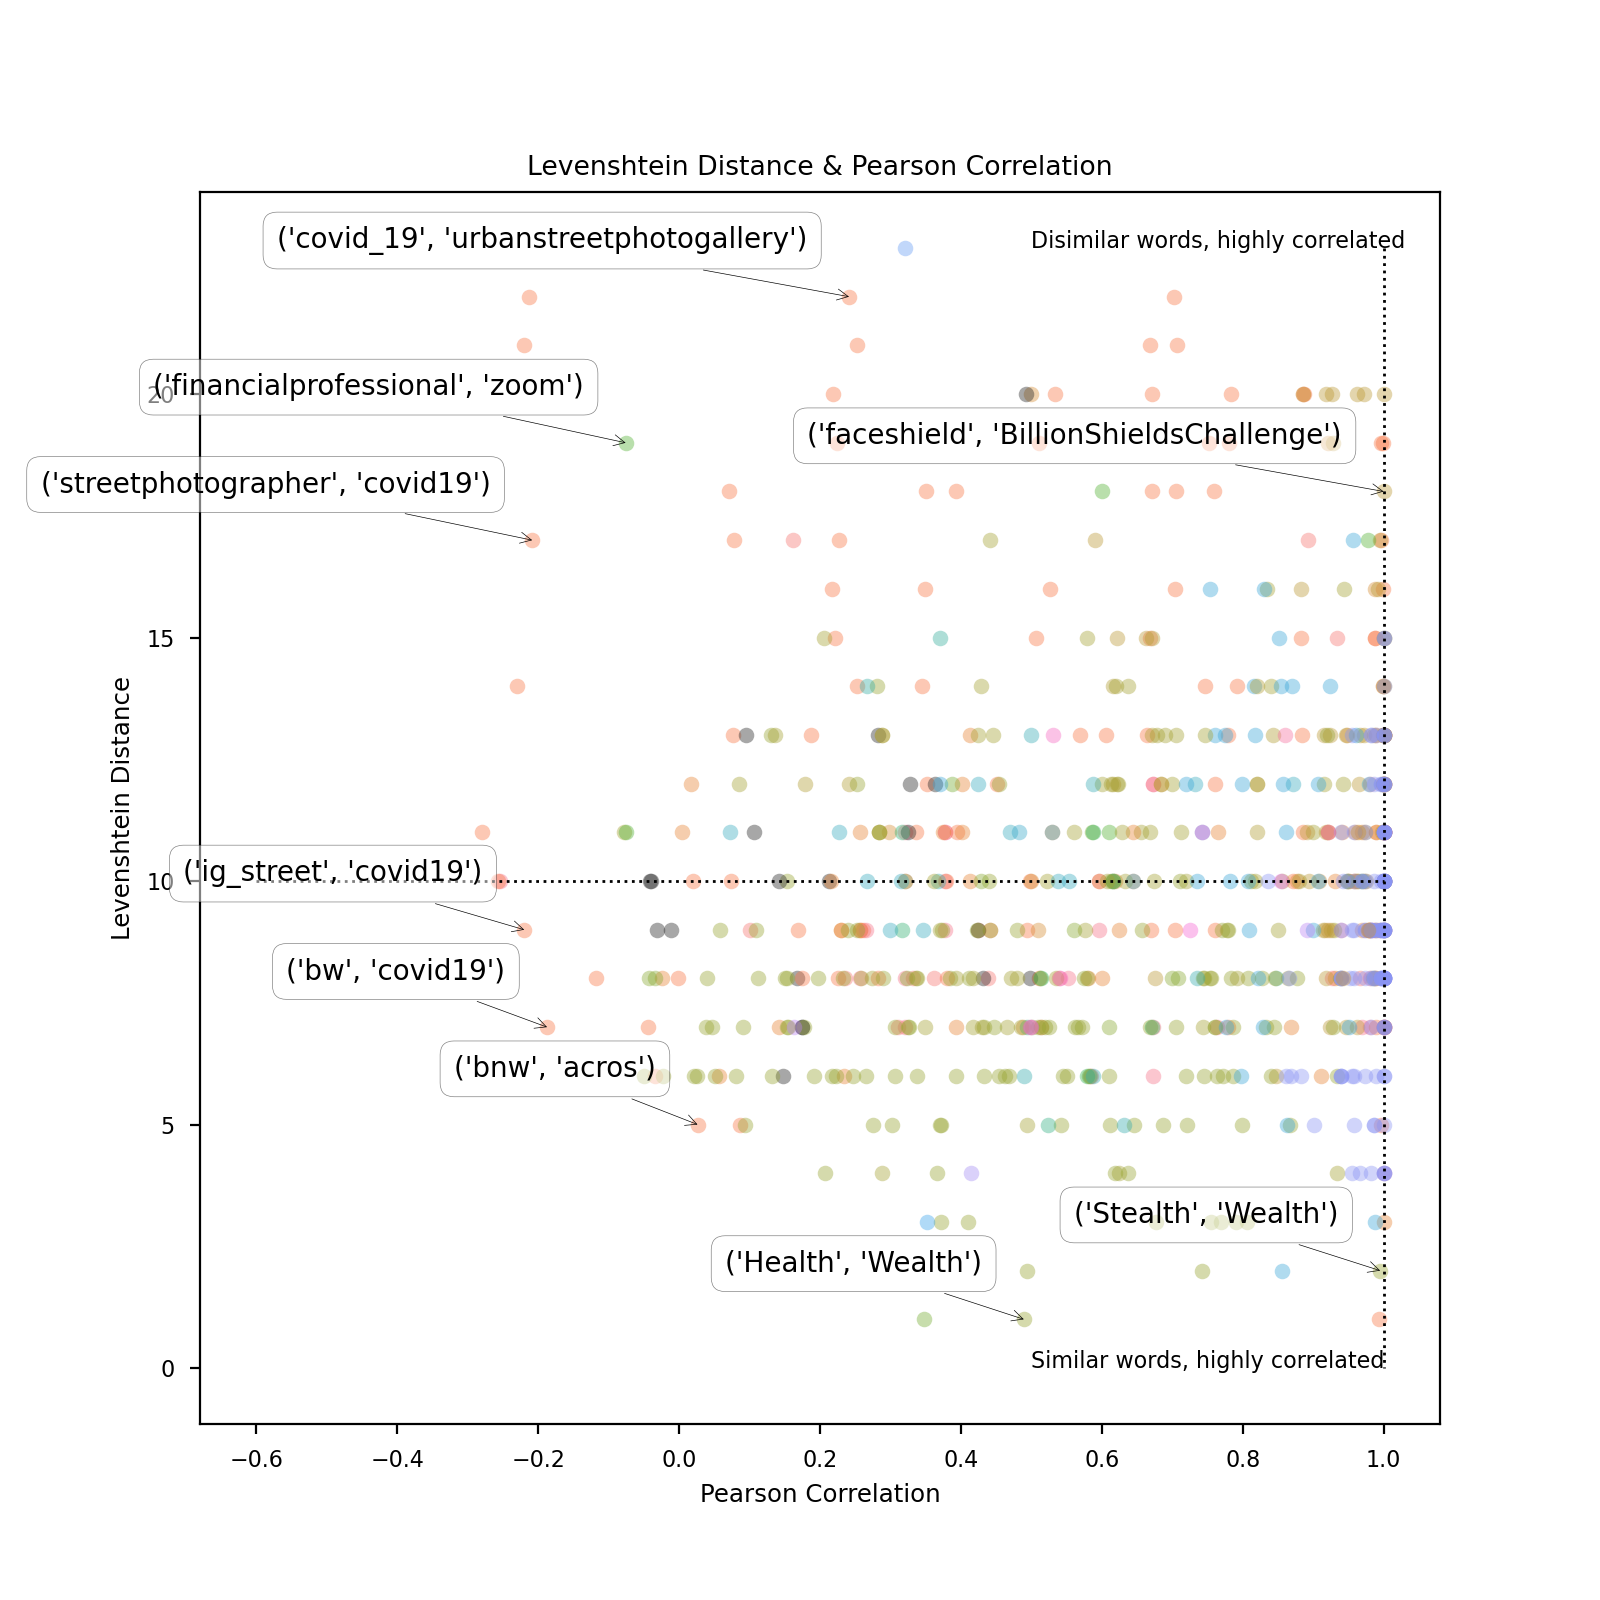

/var/folders/2r/dxh5vfq12h7bhlg2f88kpl440000gn/T/ipykernel_48141/3818846212.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([median(corr), median(corr)],[max(lev),0],'k-', linestyle = ":", lw=1)
/var/folders/2r/dxh5vfq12h7bhlg2f88kpl440000gn/T/ipykernel_48141/3818846212.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([-0.6 , 1],[median(lev),median(lev)],'k-', linestyle = ":", lw=1)


In [15]:
rm, edge_colors = measures(g1)
names = list(rm.keys())
measures_m = list(rm.values())
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
i = 0
corr = []
lev = []
wei = []
for m in measures_m:
    plt.plot(m[0], m[1], "o", label = names[i], c=edge_colors[i], alpha = .4)
    corr.append(m[0])
    lev.append(m[1])
    wei.append(m[2])
    i += 1
    
'''Levenshtein Distance & Pearson Correlation'''
plt.plot([median(corr), median(corr)],[max(lev),0],'k-', linestyle = ":", lw=1)
plt.plot([-0.6 , 1],[median(lev),median(lev)],'k-', linestyle = ":", lw=1)
ax.set_title("Levenshtein Distance & Pearson Correlation")
ax.set_xlabel("Pearson Correlation")
ax.set_ylabel("Levenshtein Distance")
datacursor(formatter='{label}'.format, bbox=dict(fc='white'),
           display='multiple', draggable=True)
ax.text(0.5,0.005,"Similar words, highly correlated",color="black",size="8")
ax.text(0.5,max(lev),"Disimilar words, highly correlated",color="black",size="8")
plt.savefig('../_generated_data/Cuadrant1', dpi = 1000)
plt.show()

<IPython.core.display.Javascript object>


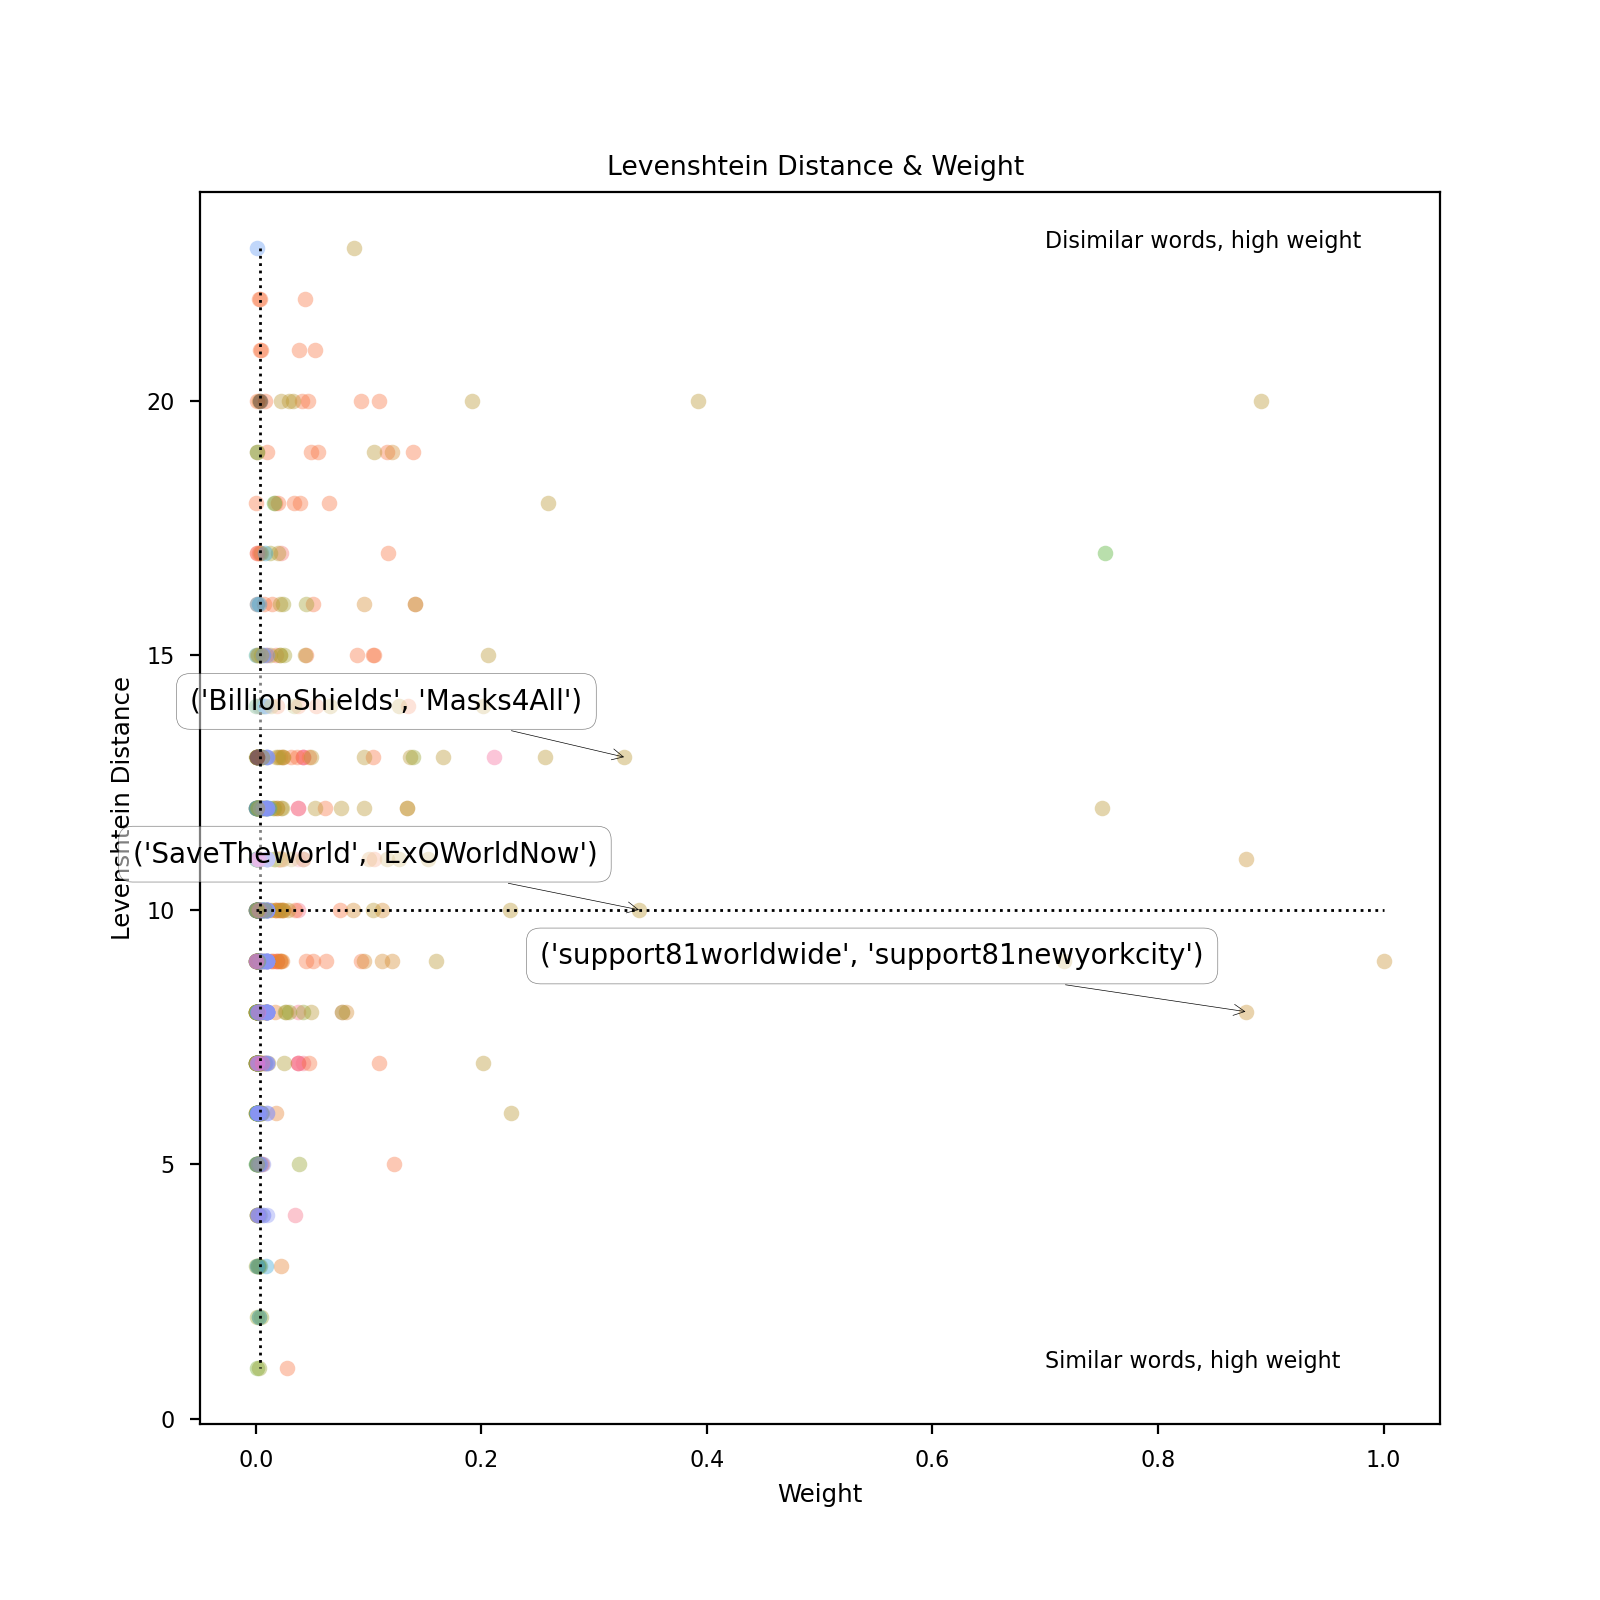

/var/folders/2r/dxh5vfq12h7bhlg2f88kpl440000gn/T/ipykernel_48141/519593436.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([median(wei), median(wei)],[max(lev),min(lev)],'k-', linestyle = ":", lw=1)
/var/folders/2r/dxh5vfq12h7bhlg2f88kpl440000gn/T/ipykernel_48141/519593436.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([min(wei) , max(wei)],[median(lev),median(lev)],'k-', linestyle = ":", lw=1)


In [13]:
rm, edge1_colors = measures(g1)
names = list(rm.keys())
measures_m = list(rm.values())
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
i = 0
corr = []
lev = []
wei = []
for m in measures_m:
    plt.plot(m[2], m[1], "o", label = names[i], c=edge1_colors[i], alpha = .4)
    corr.append(m[0])
    lev.append(m[1])
    wei.append(m[2])
    i += 1

'''Levenshtein Distance & Weight'''
plt.plot([median(wei), median(wei)],[max(lev),min(lev)],'k-', linestyle = ":", lw=1)
plt.plot([min(wei) , max(wei)],[median(lev),median(lev)],'k-', linestyle = ":", lw=1)
ax.set_title("Levenshtein Distance & Weight ")
ax.set_xlabel("Weight")
ax.set_ylabel("Levenshtein Distance")
datacursor(formatter='{label}'.format, bbox=dict(fc='white'),
           display='multiple', draggable=True)
ax.text(0.7,max(wei),"Similar words, high weight",color="black",size="8")
ax.text(0.7,max(lev),"Disimilar words, high weight",color="black",size="8")
plt.savefig('../_generated_data/Cuadrant2', dpi = 1000)
plt.show()

<IPython.core.display.Javascript object>


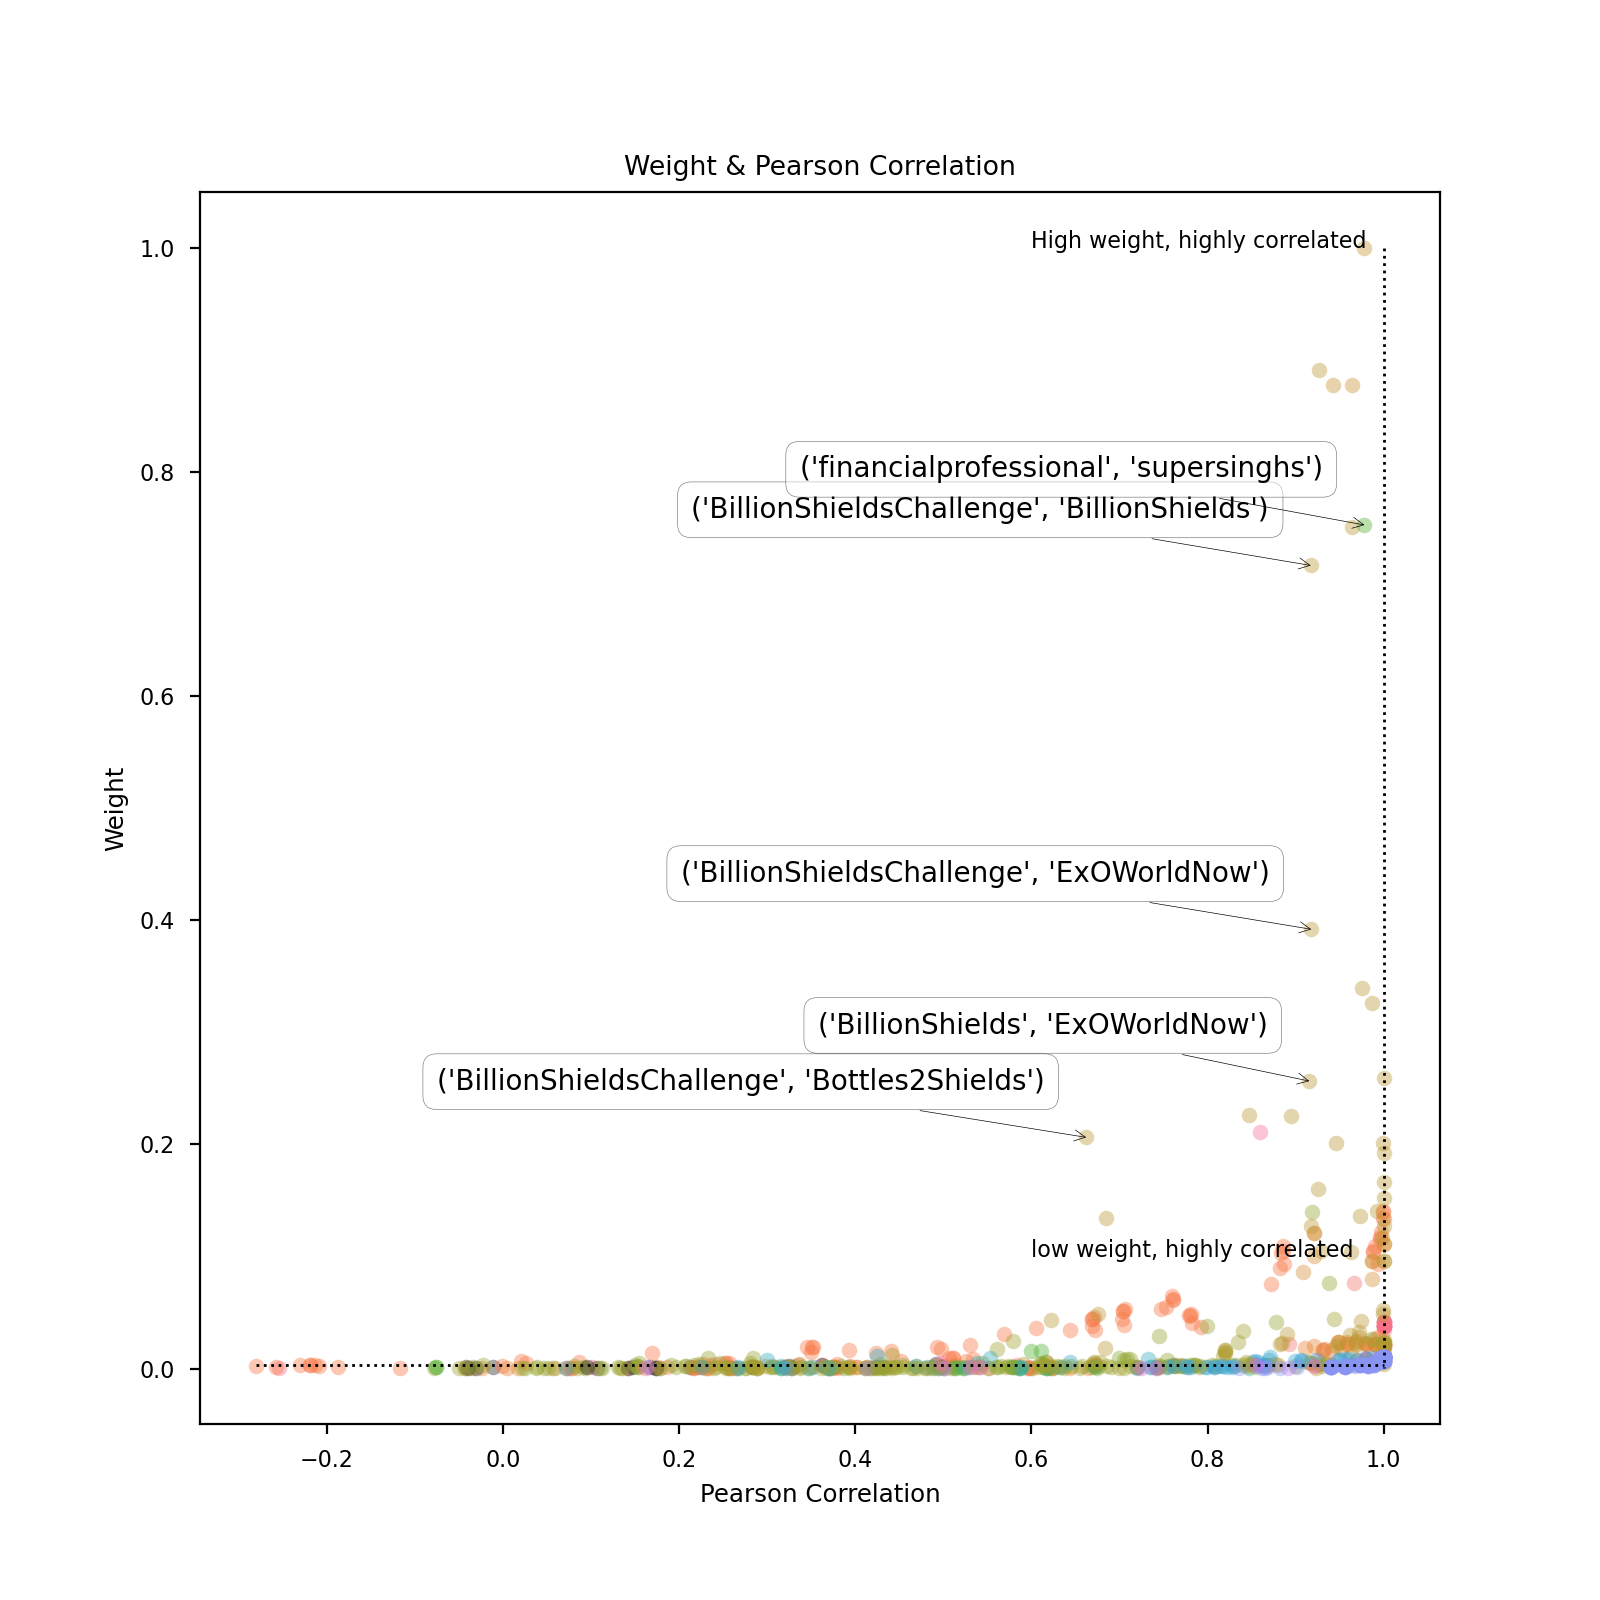

/var/folders/2r/dxh5vfq12h7bhlg2f88kpl440000gn/T/ipykernel_48141/3987135585.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([median(corr), median(corr)],[max(wei),min(wei)],'k-', linestyle = ":", lw=1)
/var/folders/2r/dxh5vfq12h7bhlg2f88kpl440000gn/T/ipykernel_48141/3987135585.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([min(corr), max(corr)],[median(wei),median(wei)],'k-', linestyle = ":", lw=1)


In [9]:
rm, edge1_colors = measures(g1)
names = list(rm.keys())
measures_m = list(rm.values())
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
i = 0
corr = []
lev = []
wei = []
for m in measures_m:
    plt.plot(m[0], m[2], "o", label = names[i], c=edge1_colors[i], alpha = .4)
    corr.append(m[0])
    lev.append(m[1])
    wei.append(m[2])
    i += 1
    
'''Weight & Pearson Correlation'''
plt.plot([median(corr), median(corr)],[max(wei),min(wei)],'k-', linestyle = ":", lw=1)
plt.plot([min(corr), max(corr)],[median(wei),median(wei)],'k-', linestyle = ":", lw=1)
ax.set_title("Weight & Pearson Correlation")
ax.set_xlabel("Pearson Correlation")
ax.set_ylabel("Weight")
datacursor(formatter='{label}'.format, bbox=dict(fc='white'), display='multiple', draggable=True)
ax.text(0.6,0.1,"low weight, highly correlated",color="black",size="8")
ax.text(0.6,max(wei),"High weight, highly correlated",color="black",size="8")
plt.savefig('../_generated_data/Cuadrant3', dpi = 1000)
plt.show()